<a href="https://colab.research.google.com/github/joao-ricardo-oliveira/PUC_Rio_MVP_3/blob/main/PUC_Rio_MVP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP Machine Learning & Analytics

Nome: João Ricardo Oliveira Moreira

Matrícula: 4052024001953

##O Projeto Busca Ativa

No MVP da sprint anterior, Análise de Dados e Boas Práticas, apresentamos o projeto Busca Ativa, uma inicativa da Ação da Cidadania.

Criada pelo sociólogo Herbet de Souza, o Betinho, a Ação da Cidadania luta há mais de três décadas contra a fome e a insegurança alimentar.

No entanto, sabemos que a simples entrega de cestas básicas não vai resolver esse problema que nos aflige há tanto tempo. Ações emergenciais têm, sim, sua relevância, mas precisamos ir muito além. A conscientização daqueles que estão em vulnerabilidade social é o mais importante passo no sentido de mudar suas realidades. Estamos falando da arma mais poderosa nessa luta tão injusta: a informação.

*Figura 1: Logo do projeto*

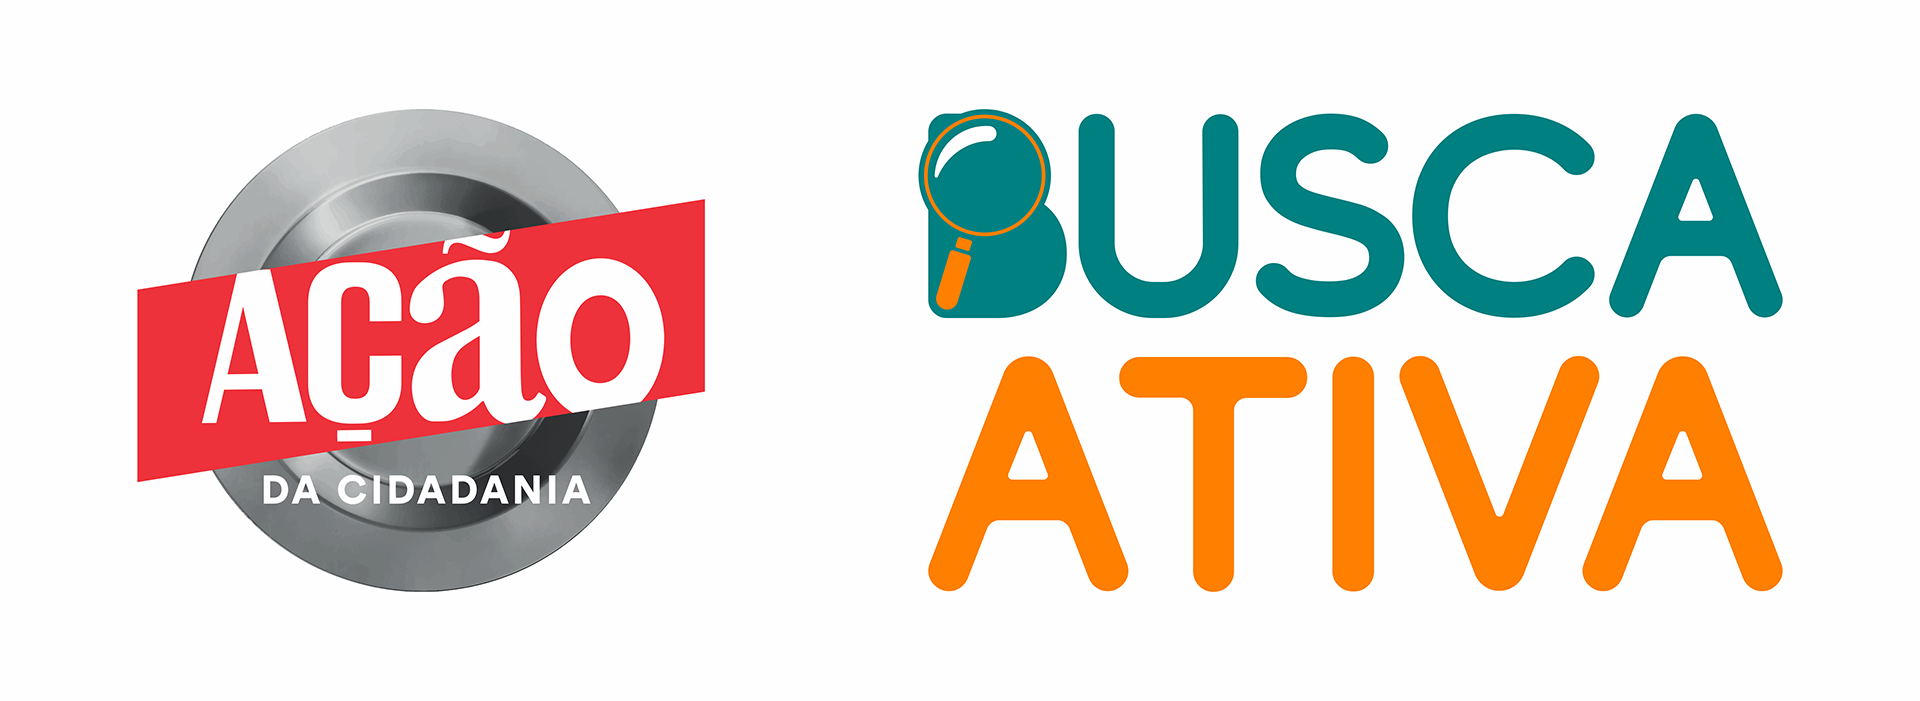
*Fonte: O Autor*

O Projeto Busca Ativa tem como objetivo entrevistar pessoas em situação de vulnerabilidade social que não estejam inscritas no CadÚnico, e que, portanto, não tenham acesso aos benefícios a que teriam direito.

Dessa forma, podemos contribuir instruindo tais pessoas a respeito de políticas públicas que poderiam ajudá-las. Além disso, a Ação da Cidadania também pode atuar como parceira do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome e todos os outros órgãos e entidades públicas, como Prefeituras, Secretarias de Segurança Alimentar e Nutricional, Centros de Referência de Assistência Social, dentre outros, na implantação e monitoramento de políticas públicas de combate à desigualdade social.

##Como Funciona o Projeto

Para uma família receber qualquer tipo de benefício, a primeira condição é estar cadastrada no CadÚnico. No entanto, como regra geral, todos os beneficiários entrevistados pelo projeto Busca Ativa não estão no CadÚnico.

Dessa forma, o projeto tem um objetiva contribuir para a incidência política daqueles que são colocados à margem e invisibilizados, atendendo famílias que nem mesmo estejam cientes de seus direitos.

Entrevistadores vão a campo para localizar e entrevistar esses pessoas. De acordo com suas respostas, e seguindo os critérios definidos pelo Governo Federal, nosso aplicativo faz uma análise inicial, dizendo quais políticas públicas poderiam ser acessadas por aquela família. Em seguida, elas são instruídas a respeito da documentação e dos postos de atendimento para cadastramento. O projeto também prevê o acompanhamento da solicitação dos benefícios, para a devida cobrança aos órgãos responsáveis.



##O MVP

Para o presente MVP, vamos focar em apenas um desses benefícios. Aquele que, sem dúvida, é o mais conhecido e controverso de todos: o Bolsa Família.

"Para receber os benefícios, a principal regra é a renda mensal por pessoa, que significa quanto você e sua família ganham por mês, dividido pelo número de pessoas da família. Se a renda mensal por pessoa for de até R$ 218 (situação de pobreza), **a entrada no Programa Bolsa Família pode acontecer** [grifo nosso]."
(Fonte: https://www.gov.br/pt-br/servicos/receber-o-bolsa-familia?utm_source=chatgpt.com. Acesso em: 26 set. 2025)

O MDS estabelece, como condição para receber o benefício, uma renda per capita de até R$ 218. Parece simples, direto e objetivo.

Mas não é.

O trecho "pode acontecer", grifado na citação acima, é reforçado por outro trecho encontrado logo adiante no mesmo website:

"Você vai precisar se inscrever no Cadastro Único (CadÚnico) e aguardar a análise de um sistema informatizado, que avalia todas as regras do Programa A entrada no Bolsa Família não é automática, pois o Governo Federal analisa o limite orçamentário do programa." (Fonte: https://www.gov.br/pt-br/servicos/receber-o-bolsa-familia?utm_source=chatgpt.com. Acesso em: 26 set. 2025)

Ou seja, os critérios não são tão transparentes assim. Ao implementar o algoritmo em nosso app do projeto Busca Ativa, a partir dos critérios conhecidos, podemos dizer se um beneficiário está apto ou não a receber o benefício. Mas se ele vai recebê-lo de fato ou não depende de uma série de outros critérios que nos são desconhecidos.  

Diante do exposto, um modelo de Machine Learning desenvolvido pelo presente MVP pode contribuir imensamente para o Projeto Busca Ativa.

##O Modelo

Estamos diante de um problema de classificação. Determinado beneficiário terá ou não seu benefício aprovado?

Para construirmos o modelos, vamos nos basear em 7.735 famílias entrevistadas que, depois de devidamente cadastradas no CadÚnico, fizeram seus pedidos de aprovação no Bolsa Família, tendo sido aprovados ou não.

Os dados podem ser assim resumidos:

|              | Aprovados | Não Aprovados | Total |
|--------------|-----------|---------------|-------|
| Elegíveis    | 3.590     | 664           |4.254  |
| Não Elegíveis| 0         | 3.481         |3.481  |
| Total        | 3.590     | 4.145         |7.735  |


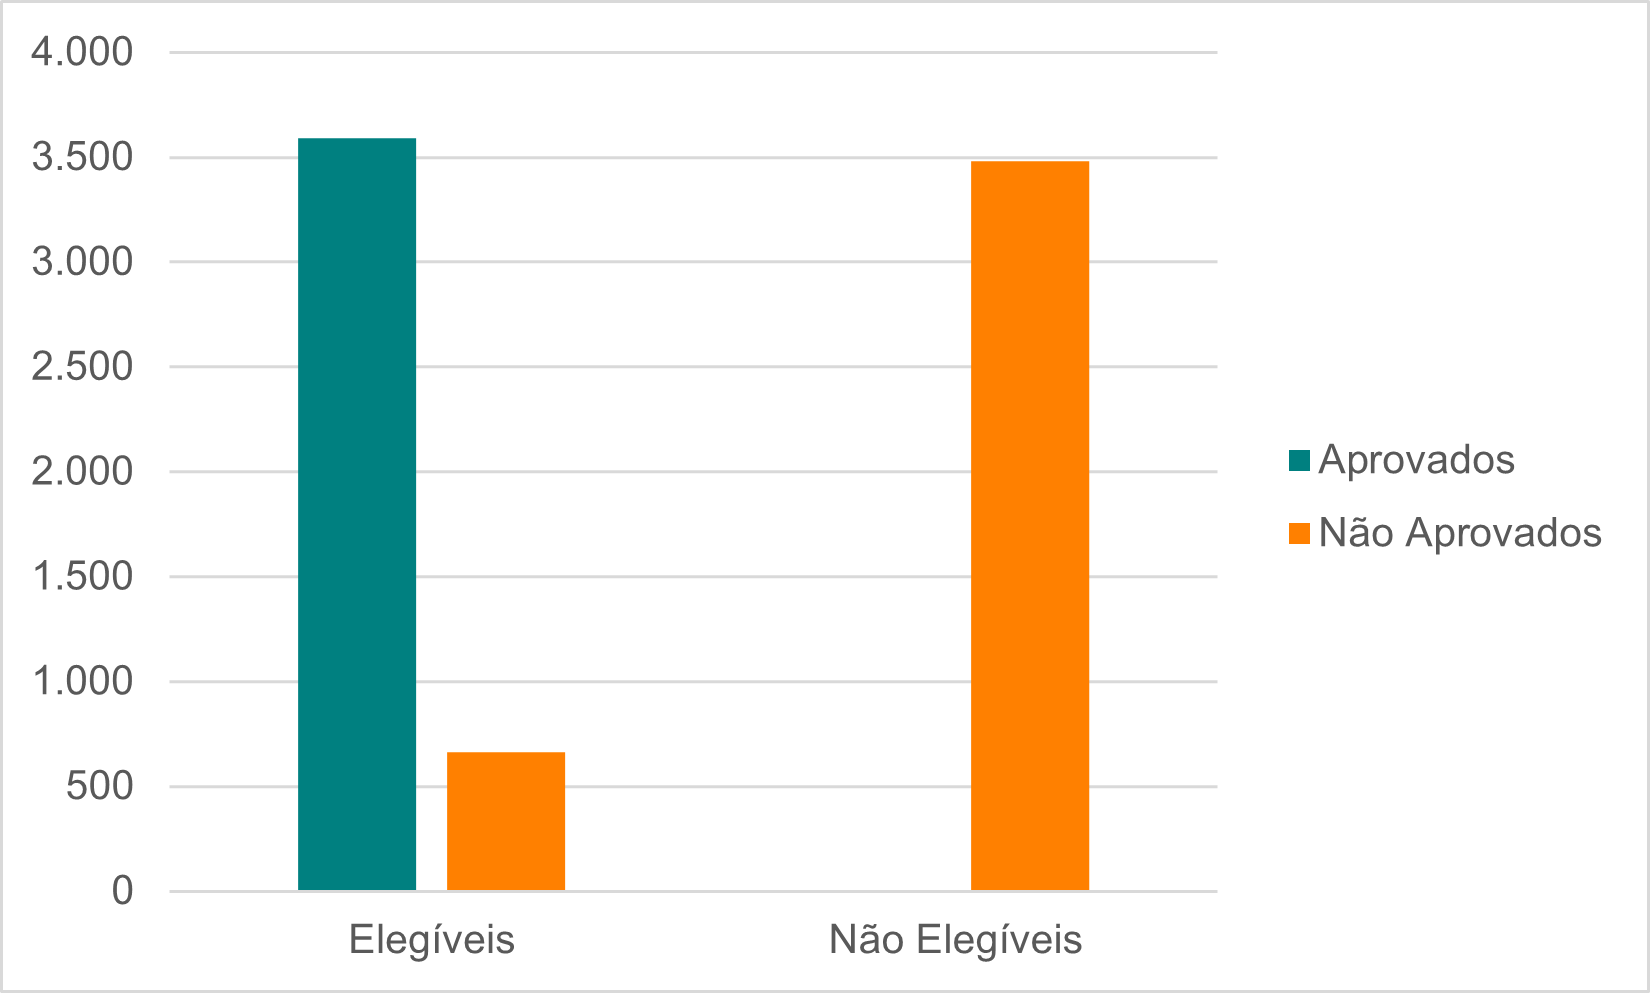

Sabemos que há famílias com renda per capita superior a R$ 218 que recebem o benefício. Mas isso se dá pela entrada anterior dessas famílias no programa, quando os critérios eram outros. Como esses 7.735 casos aqui analisados são recentes, faz sentido que nenhum deles tenha sido aprovado.

No entanto, o contrário não é verdade.

Nem todos os 4.254 beneficiários entrevistados que são elegíveis ao programa foram contemplados. Certamente, aqui, estamos diante dos critérios subjetivos de análise, aos quais não temos acesso.

É neste sentido que um modelo de Machine Learning pode contribuir ainda mais para as estratégias de nossa equipe na condução do Projeto Busca Ativa.

Portanto, mãos à obra!

##Fazendo as importações necessárias

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##Criando a Camada Bronze da Base de Dados

Vamos criar a camada bronze a partir do carregamento da base de dados original do projeto Busca Ativa.

In [12]:
# Inicializando a camada bronze
familias_df_bronze = pd.read_csv("https://raw.githubusercontent.com/joao-ricardo-oliveira/PUC_Rio_MVP_3/refs/heads/main/familias.csv",sep=";").convert_dtypes()


familias_df_bronze.head()

,cod_familia,nome_civil,pessoa_trans,nome_social,cpf,data_nascimento,idade,sexo,raca_cor,pcd,...,cod_entrevistador,autorizacao_uso_dados,observacoes,qtd_criancas_familia,qtd_adolescentes_familia,qtd_gestantes_familia,qtd_idosos_familia,qtd_pcd_familia,elegivel_bolsa_familia,beneficio_aprovado
0,2024-04-09-R-6343,###### ######## ######,Não,##########################,###.###.###-##,1974-08-07,51,Feminino,Parda,Não,...,b791bcb8,Sim,<NA>,0,0,0,0,0,Não,Não
1,2024-04-09-R-9610,######## ######## ######,Não,###########################,###.###.###-##,1991-09-12,34,Feminino,Parda,Não,...,b791bcb8,Sim,<NA>,1,0,0,0,0,Não,Não
2,2024-04-09-R-4328,######## ####### ##### ####,Não,############################,###.###.###-##,2006-02-09,19,Masculino,Preta,Não,...,b791bcb8,Sim,<NA>,1,0,0,0,0,Sim,Sim
3,2024-04-09-R-1969,####### ####### ## #####,Não,###################################,###.###.###-##,1989-07-25,36,Masculino,Branca,Não,...,b791bcb8,Sim,<NA>,3,1,0,0,0,Sim,Sim
4,2024-04-09-R-6769,####### ###### ## ##### ########,Não,#################################,###.###.###-##,1997-07-19,28,Feminino,Parda,Não,...,b791bcb8,Sim,<NA>,1,0,0,0,0,Sim,Sim


##Conhecendo a camada bronze da base de dados

In [13]:
total_registros = "{:,}".format(familias_df_bronze.shape[0]).replace(",", ".")
total_atributos = familias_df_bronze.shape[1]

print(f"A camada bronze da base de dados possui um total de {total_registros} registros, classificados de acordo com {total_atributos} atributos.")


A camada bronze da base de dados possui um total de 7.735 registros, classificados de acordo com 34 atributos.


In [14]:
familias_df_bronze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cod_familia               7735 non-null   string 
 1   nome_civil                7735 non-null   string 
 2   pessoa_trans              7735 non-null   string 
 3   nome_social               7735 non-null   string 
 4   cpf                       7735 non-null   string 
 5   data_nascimento           7735 non-null   string 
 6   idade                     7735 non-null   Int64  
 7   sexo                      7735 non-null   string 
 8   raca_cor                  7735 non-null   string 
 9   pcd                       7735 non-null   string 
 10  escolaridade              7735 non-null   string 
 11  renda_responsavel         7735 non-null   Float64
 12  renda_familiar            7735 non-null   Float64
 13  membros_familia           7735 non-null   Int64  
 14  renda_pe

Dicionário de dados:

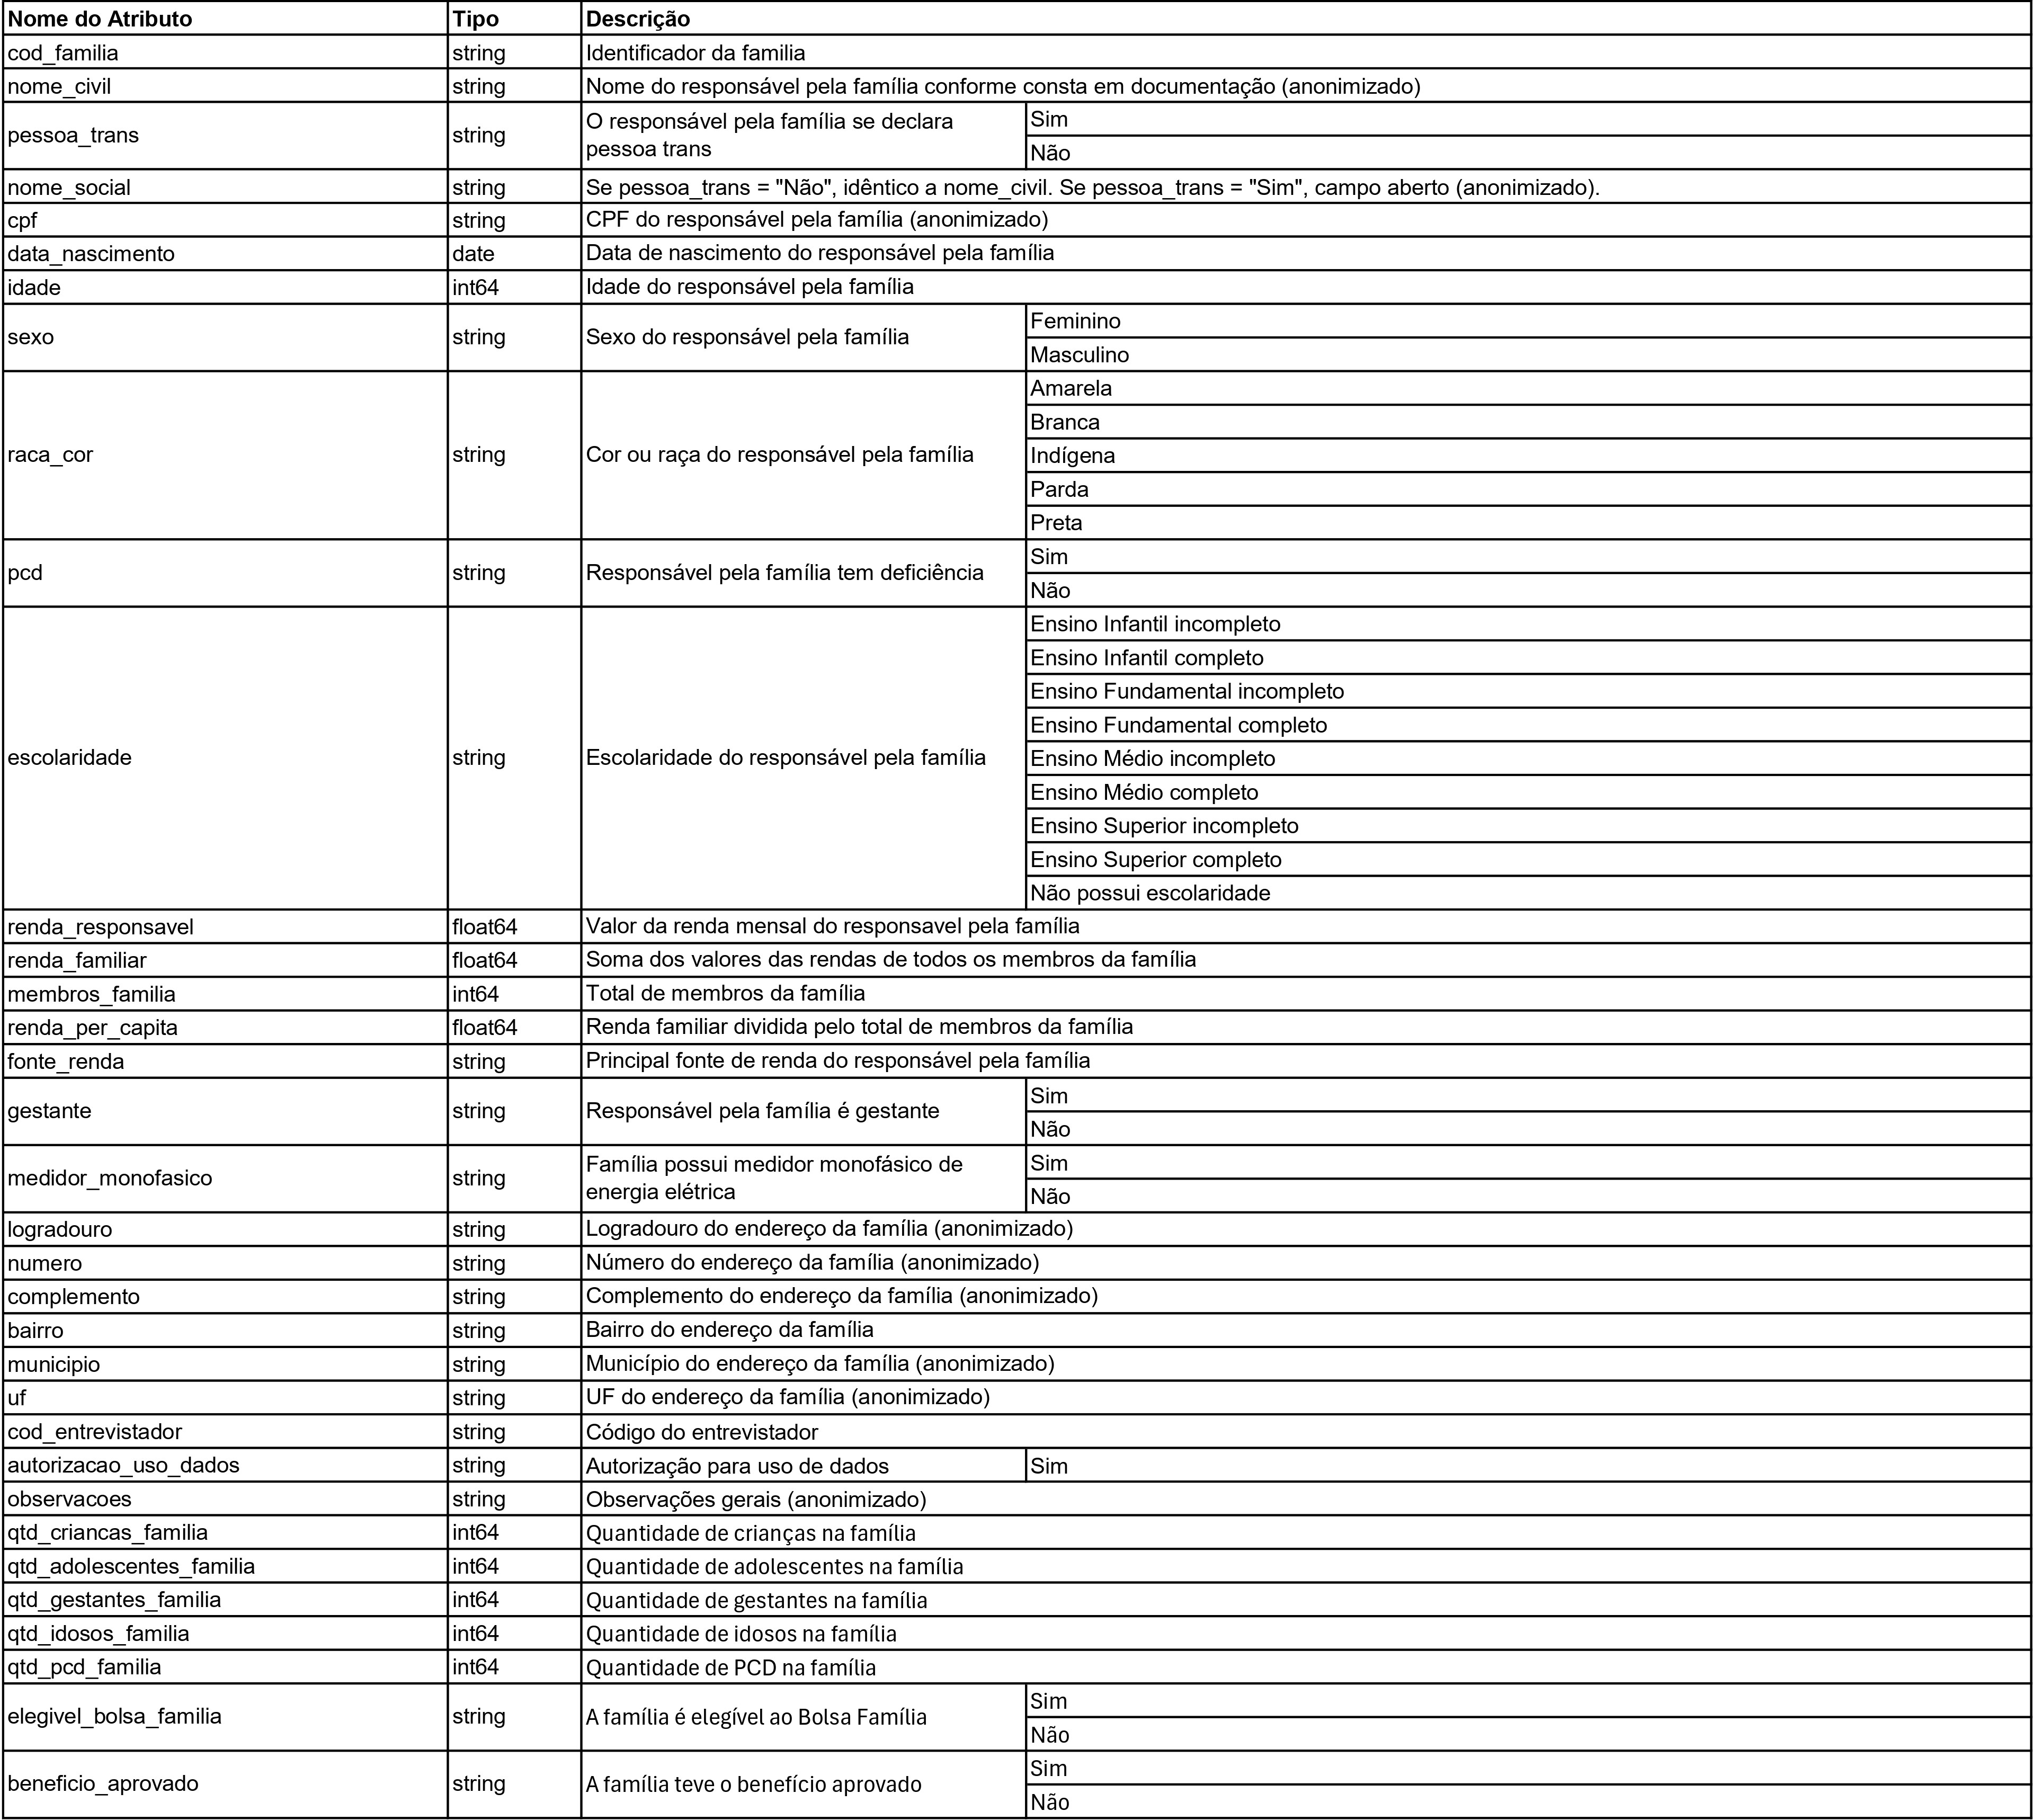

##Criando a Camada Silver da Base de Dados

Para criar a camada silver, vamos codificar as features categóricas, bem como o target. São eles:

* pessoa_trans
  * Sim
  * Não
* sexo
  * Masculino
  * Feminino
* raca_cor
  * Amarela
  * Branca
  * Indígena
  * Parda
  * Preta
* pcd
  * Sim
  * Não
* escolaridade
  * Ensino Infantil incompleto
  * Ensino Infantil completo
  * Ensino Fundamental incompleto
  * Ensino Fundamental completo
  * Ensino Médio incompleto
  * Ensino Médio completo
  * Ensino Superior incompleto
  * Ensino Superior completo
  * Não possui escolaridade
* gestante
  * Sim
  * Não
* medidor_monofásico
  * Sim
  * Não
* elegivel_bolsa_familia
  * Sim
  * Não
* beneficio_concedido
  * Sim
  * Não

In [15]:
# Inicializando a camada silver
familias_df_silver = familias_df_bronze

# Utilizando LabelEnconder nos atributos binários de valores "Sim" ou "Não"
binarios_sim_nao = ["pessoa_trans","pcd","gestante","medidor_monofasico","elegivel_bolsa_familia","beneficio_aprovado"]

for atributo in binarios_sim_nao :
  familias_df_silver[atributo] = familias_df_silver[atributo].map({"Não": 0, "Sim": 1})

# Utilizando LabelEncoder no atributo binário "sexo", de valores "Masculino" ou "Feminino"
familias_df_silver["sexo"] = familias_df_silver["sexo"].map({"Masculino": 0, "Feminino": 1})

# Utilizando OneHotEncoding nos atributos com várias classes
atributos_categoricos = ["raca_cor","escolaridade"]
familias_df_silver = pd.get_dummies(familias_df_silver, columns=atributos_categoricos, drop_first=True)

# Finalizando a camada silver
familias_df_silver = familias_df_silver.select_dtypes(include=[np.number])

familias_df_silver.head()

,pessoa_trans,idade,sexo,pcd,renda_responsavel,renda_familiar,membros_familia,renda_per_capita,gestante,medidor_monofasico,qtd_criancas_familia,qtd_adolescentes_familia,qtd_gestantes_familia,qtd_idosos_familia,qtd_pcd_familia,elegivel_bolsa_familia,beneficio_aprovado
0,0,51,1,0,400.0,400.0,1,400.0,0,1,0,0,0,0,0,0,0
1,0,34,1,0,700.0,700.0,2,350.0,0,0,1,0,0,0,0,0,0
2,0,19,0,0,0.0,0.0,2,0.0,0,0,1,0,0,0,0,1,1
3,0,36,0,0,590.0,590.0,5,118.0,0,1,3,1,0,0,0,1,1
4,0,28,1,0,150.0,150.0,2,75.0,0,0,1,0,0,0,0,1,1


##Criando a Camada Gold da Base de Dados

Vamos criar a camada gold a partir da normalização dos atributos numéricos da camada silver.



In [16]:
# Inicializando a camada gold
familias_df_gold = familias_df_silver

# Definindo os atributos numéricos
atributos_numericos = ["idade","renda_responsavel","renda_familiar","membros_familia","renda_per_capita"]

# Criando a instância do normalizador
scaler = MinMaxScaler()

# Finalizando a camada gold
familias_df_gold[atributos_numericos] = scaler.fit_transform(familias_df_gold[atributos_numericos])

familias_df_gold.head()

,pessoa_trans,idade,sexo,pcd,renda_responsavel,renda_familiar,membros_familia,renda_per_capita,gestante,medidor_monofasico,qtd_criancas_familia,qtd_adolescentes_familia,qtd_gestantes_familia,qtd_idosos_familia,qtd_pcd_familia,elegivel_bolsa_familia,beneficio_aprovado
0,0,0.384615,1,0,0.002331,0.002331,0.000000,0.002331,0,1,0,0,0,0,0,0,0
1,0,0.197802,1,0,0.004079,0.004079,0.055556,0.002040,0,0,1,0,0,0,0,0,0
2,0,0.032967,0,0,0.000000,0.000000,0.055556,0.000000,0,0,1,0,0,0,0,1,1
3,0,0.219780,0,0,0.003438,0.003438,0.222222,0.000688,0,1,3,1,0,0,0,1,1
4,0,0.131868,1,0,0.000874,0.000874,0.055556,0.000437,0,0,1,0,0,0,0,1,1


##Preparando os Dados

Vamos preparar o holdout, separando os dados em base de treino e base de teste. Em seguida, vamos criar os folds para realizar a validação cruzada.

In [17]:
dados = familias_df_gold.values

# As features são definidas pelas primeiras 16 colunas
x = familias_df_gold.drop(columns=["beneficio_aprovado"])

# O target é a 17a coluna, "beneficio_aprovado"
y = familias_df_gold["beneficio_aprovado"].astype(int)

# Dividindo a base de dados em teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.20,random_state=7)

# Criando os folds
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)

##Criando, Treindando e Avaliando Modelos

Vamos criar, treinar e avaliar modelos em KNN, Árvore de Classificação, Naive Bayes e SVM.

KNN  : média 0.897059, com desvio-padrão 0.011096
CART : média 0.861183, com desvio-padrão 0.011699
NB   : média 0.910635, com desvio-padrão 0.012255
SVM  : média 0.911766, com desvio-padrão 0.012215



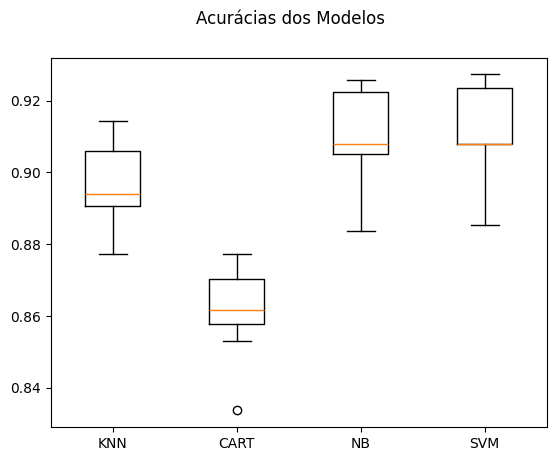

In [18]:
# Definindo uma semente global para garantir a reprodutibilidade
np.random.seed(7)

# Criando as listas
modelos = []
resultados = []
nomes = []

# Inserindo modelos à lista de modelos
modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('CART',DecisionTreeClassifier()))
modelos.append(('NB',GaussianNB()))
modelos.append(('SVM',SVC()))

# Avaliando os modelos
for nome, modelo in modelos :
  resultado = cross_val_score(modelo,x_treino,y_treino,cv = 10, scoring='accuracy')
  resultados.append(resultado)
  nomes.append(nome)
  mensagem = f"{nome:<5}: média {resultado.mean():.6f}, com desvio-padrão {resultado.std():.6f}"
  print(mensagem)

# Preparando o boxplot
figura = plt.figure()
figura.suptitle("Acurácias dos Modelos")
ax = figura.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)

#Exibindo o boxplot
print()
plt.show()




##Análise dos Modelos

Podemos observar que o SVM teve a maior média de acurácia (91,2%), ligeiramente superior ao de Naive Bayes (91,1%). Seus desvios-padrão também foram muito próximos. Se a prioridade fosse simplicidade e rapidez de treinamento, poderíamos optar por Naive Bayes. Mas pelo desempenho ligeiramente superior, vamos optar pelo SVM.

##Avaliando o Modelo SVM

In [19]:
modelo = SVC()
modelo.fit(x_treino,y_treino)

predicoes = modelo.predict(x_teste)
acuracia = accuracy_score(y_teste, predicoes)

print(f"O modelo teve uma acurácia de {acuracia*100:.1f}%")

O modelo teve uma acurácia de 92.3%


##Conclusão

Sabemos que, a depender das circunstâncias, altas acurácias podem indicar overfitting. Para minimizar esse risco, ajustes de hiperparâmetros ou uso de ensembles são estratégias recomendadas.

No entanto, como a acurácia do teste foi próxima das médias do treino, além de termos um baixo desvio-padrão, acredito que o modelo generaliza bem e que os resultados obtidos sejam confiáveis.

Academicamente falando, teria sido ideal explorar hiperparâmetros e ensembles. Mas, em virtude da escassez do tempo, optei por não fazê-lo.

Independente disso, acredito ter chegado a um modelo consistente, que certamente agregará valor ao Projeto Busca Ativa, contribuindo para o estabelecimento de melhores estratégias para chegarmos aonde precisamos chegar.

E assim, a cada passo, a cada nova ferramenta aprendida, podemos trabalhar para minimizar a injustiça e a desigualdade social.